In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, MaxPool2D
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib
import pandas as pd
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from google.colab import drive

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import numpy as np
import os
import pathlib
import pandas as pd
import cv2
import PIL
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define dataset paths
data_dir_train = pathlib.Path("/content/drive/MyDrive/skin cancer/Trainisic2017")
data_dir_test = pathlib.Path("/content/drive/MyDrive/skin cancer/Testisic2017")

# Define parameters
batch_size = 32
img_height = 180
img_width = 180
epochs = 20

# Function to remove hair using morphological operations
def remove_hair(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)

    _, thresh = cv2.threshold(blackhat, 10, 255, cv2.THRESH_BINARY)
    inpainted = cv2.inpaint(image, thresh, inpaintRadius=10, flags=cv2.INPAINT_TELEA)
    return inpainted

# Function to apply CLAHE for contrast enhancement
def enhance_contrast(image):
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    l = clahe.apply(l)
    lab = cv2.merge([l, a, b])
    enhanced = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
    return enhanced

# Function to normalize illumination
def normalize_illumination(image):
    img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    img_norm = cv2.equalizeHist(img_gray)
    img_norm = cv2.cvtColor(img_norm, cv2.COLOR_GRAY2RGB)
    return img_norm

# Function to apply all preprocessing steps
def preprocess_image(image):
    image = remove_hair(image)
    image = enhance_contrast(image)
    image = normalize_illumination(image)
    image = cv2.resize(image, (img_height, img_width))
    image = image / 255.0  # Normalize to [0,1]
    return image

# Function to preprocess dataset and save images
def preprocess_dataset(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for class_folder in os.listdir(input_dir):
        class_path = os.path.join(input_dir, class_folder)
        save_class_path = os.path.join(output_dir, class_folder)

        if not os.path.exists(save_class_path):
            os.makedirs(save_class_path)

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            if image is not None:
                image = preprocess_image(image)
                save_path = os.path.join(save_class_path, img_name)
                cv2.imwrite(save_path, (image * 255).astype(np.uint8))  # Convert back to 0-255
                print(f"Preprocessed: {img_name}")



# Load preprocessed dataset

 




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import numpy as np
import os
import pathlib
import pandas as pd
import cv2
import PIL
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define dataset paths
data_dir_train = pathlib.Path("/content/drive/MyDrive/skin cancer/Trainisic2017")
data_dir_test = pathlib.Path("/content/drive/MyDrive/skin cancer/Testisic2017")

# Define parameters
batch_size = 32
img_height = 180
img_width = 180
epochs = 20

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    preprocessed_test_dir,
    batch_size=batch_size,
    image_size=(img_height, img_width)
)

Found 750 files belonging to 3 classes.


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    preprocessed_train_dir,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    label_mode='categorical',
    seed=123,
    subset="training",
    validation_split=0.2
)


Found 2000 files belonging to 3 classes.
Using 1600 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    preprocessed_train_dir,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    label_mode='categorical',
    seed=123,
    subset="validation",
    validation_split=0.2
)

Found 2000 files belonging to 3 classes.
Using 400 files for validation.


In [ ]:
def preprocess_dataset(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for class_folder in os.listdir(input_dir):
        class_path = os.path.join(input_dir, class_folder)
        save_class_path = os.path.join(output_dir, class_folder)

        if not os.path.exists(save_class_path):
            os.makedirs(save_class_path)

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            if image is not None:
                image = preprocess_image(image)
                save_path = os.path.join(save_class_path, img_name)
                cv2.imwrite(save_path, (image * 255).astype(np.uint8))  # Convert back to 0-255
                print(f"Preprocessed: {img_name}")


In [ ]:
def remove_hair(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)

    _, thresh = cv2.threshold(blackhat, 10, 255, cv2.THRESH_BINARY)
    inpainted = cv2.inpaint(image, thresh, inpaintRadius=10, flags=cv2.INPAINT_TELEA)
    return inpainted

In [ ]:
# Function to apply all preprocessing steps
def preprocess_image(image):
    image = remove_hair(image)
    image = enhance_contrast(image)
    image = normalize_illumination(image)
    image = cv2.resize(image, (img_height, img_width))
    image = image / 255.0  # Normalize to [0,1]
    return image

In [ ]:
def enhance_contrast(image):
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    l = clahe.apply(l)
    lab = cv2.merge([l, a, b])
    enhanced = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
    return enhanced

In [ ]:
def normalize_illumination(image):
    img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    img_norm = cv2.equalizeHist(img_gray)
    img_norm = cv2.cvtColor(img_norm, cv2.COLOR_GRAY2RGB)
    return img_norm

In [ ]:
# Preprocess images
preprocessed_train_dir = "/content/drive/MyDrive/skin cancer/Preprocessed_Train"
preprocessed_test_dir = "/content/drive/MyDrive/skin cancer/Preprocessed_Test"
preprocess_dataset(str(data_dir_train), preprocessed_train_dir)
preprocess_dataset(str(data_dir_test), preprocessed_test_dir)

In [ ]:
# Load dataset (example: using image_dataset_from_directory)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/skin cancer/Preprocessed_Train",  # Change this to your actual dataset path
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)

# Access class names immediately after loading the dataset
class_names = train_ds.class_names
num_classes = len(class_names)

# Now apply performance optimizations
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


Found 2000 files belonging to 3 classes.


In [ ]:
# Apply performance optimizations


# Access the class names before applying performance optimizations to the dataset


# Define CNN model
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    # Use num_classes for the output layer
    layers.Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=['accuracy']
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from google.colab import drive
import shutil
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define paths
source_train = "/content/drive/MyDrive/skin cancer/Trainisic2017"  # Update this path if needed
source_test = "/content/drive/MyDrive/skin cancer/Testisic2017"    # Update this path if needed
destination_folder = "/content/drive/MyDrive/dataset_copy"

# Create the new folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Copy train and test folders into the new folder
shutil.copytree(source_train, os.path.join(destination_folder, "train"), dirs_exist_ok=True)
shutil.copytree(source_test, os.path.join(destination_folder, "test"), dirs_exist_ok=True)

print("Train and test folders copied successfully into 'dataset_copy'!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train and test folders copied successfully into 'dataset_copy'!


In [ ]:
from google.colab import drive
import os
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Define the paths (change these to your actual paths in Google Drive)
source_train_dir = '/content/drive/MyDrive/skin cancer/Trainisic2017'  # Path to your train images
source_test_dir = '/content/drive/MyDrive/skin cancer/Testisic2017'  # Path to your test images
destination_dir = '/content/drive/MyDrive/prev_data'  # New directory in Drive where the folders will be created

# Create the 'prev_data' folder if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Create subfolders for 'train' and 'test' inside 'prev_data'
os.makedirs(os.path.join(destination_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(destination_dir, 'test'), exist_ok=True)

# Function to copy images from source to destination folder
def copy_images(source_dir, dest_dir):
    for filename in os.listdir(source_dir):
        source_image_path = os.path.join(source_dir, filename)
        if os.path.isfile(source_image_path):
            # Copy the file to the destination folder
            shutil.copy(source_image_path, dest_dir)

# Copy train images to 'prev_data/train'
copy_images(source_train_dir, os.path.join(destination_dir, 'train'))

# Copy test images to 'prev_data/test'
copy_images(source_test_dir, os.path.join(destination_dir, 'test'))

print("Train and Test images have been copied successfully to 'prev_data'!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train and Test images have been copied successfully to 'prev_data'!


In [ ]:
from google.colab import drive
import os
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Define the source directories for train and test images
source_train_dir = '/content/drive/MyDrive/skin cancer/Trainisic2017'  # Path to train images
source_test_dir = '/content/drive/MyDrive/skin cancer/Testisic2017'  # Path to test images

# Define the destination directory (prev_data) where you want to copy the images
destination_dir = '/content/drive/MyDrive/prev_data'

# Create the 'prev_data' folder if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Create subfolders for 'train' and 'test' inside 'prev_data'
os.makedirs(os.path.join(destination_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(destination_dir, 'test'), exist_ok=True)

# Function to copy images from source to destination folder, preserving class structure
def copy_images_by_class(source_dir, dest_dir):
    # Loop through each class folder in source directory
    for class_folder in os.listdir(source_dir):
        class_folder_path = os.path.join(source_dir, class_folder)

        # Check if it's a directory (i.e., class folder)
        if os.path.isdir(class_folder_path):
            # Create corresponding class folder in destination (train or test)
            os.makedirs(os.path.join(dest_dir, class_folder), exist_ok=True)

            # Loop through all images in the class folder and copy them to the destination
            for filename in os.listdir(class_folder_path):
                source_image_path = os.path.join(class_folder_path, filename)
                if os.path.isfile(source_image_path):
                    shutil.copy(source_image_path, os.path.join(dest_dir, class_folder, filename))

# Copy train images from Trainisic2017 to 'prev_data/train'
copy_images_by_class(source_train_dir, os.path.join(destination_dir, 'train'))

# Copy test images from Testisic2017 to 'prev_data/test'
copy_images_by_class(source_test_dir, os.path.join(destination_dir, 'test'))

print("Images from Trainisic2017 and Testisic2017 have been copied to 'prev_data' successfully!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Train model
history = model.fit
# Train model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)



Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 366s 2s/step - accuracy: 0.5865 - loss: 1.3170 - val_accuracy: 0.7000 - val_loss: 0.8266
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.6846 - loss: 0.8342 - val_accuracy: 0.7000 - val_loss: 0.7510
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.6955 - loss: 0.7772 - val_accuracy: 0.7050 - val_loss: 0.7597
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.6951 - loss: 0.7545 - val_accuracy: 0.7225 - val_loss: 0.6741
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.6883 - loss: 0.7167 - val_accuracy: 0.7425 - val_loss: 0.6158
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.7285 - loss: 0.6449 - val_accuracy: 0.7700 - val_loss: 0.5671
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.7393 - loss: 0.5978 - val_accuracy: 0.7750 - val_loss: 0.5045
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.8063 - loss: 0.5102 - val_accuracy: 0.8100 - v

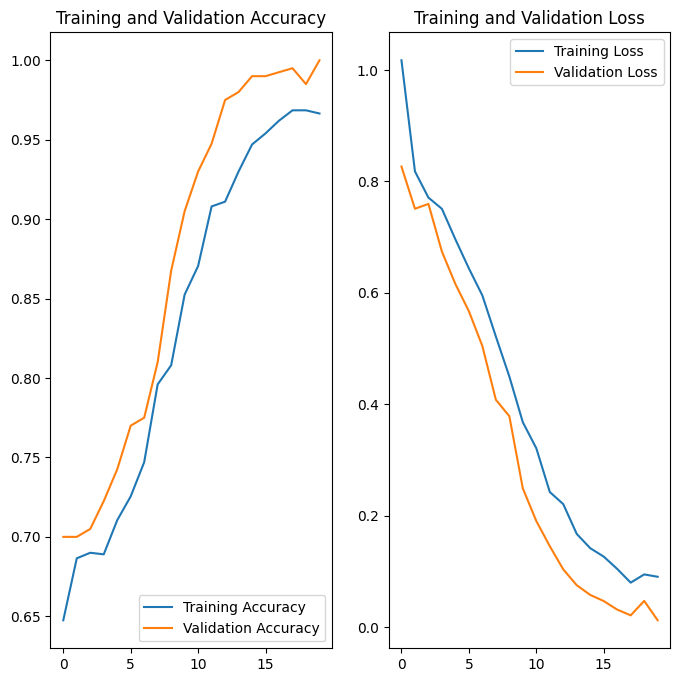

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:

loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 592ms/step - accuracy: 0.9977 - loss: 0.0115
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 635ms/step - accuracy: 1.0000 - loss: 0.0116
Accuracy:  0.9990000128746033
Validation Accuracy:  1.0
Loss:  0.010377022437751293
Validation Loss 0.012274423614144325


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.RandomRotation(0.9),
    layers.RandomZoom(0.9),
  ]
)


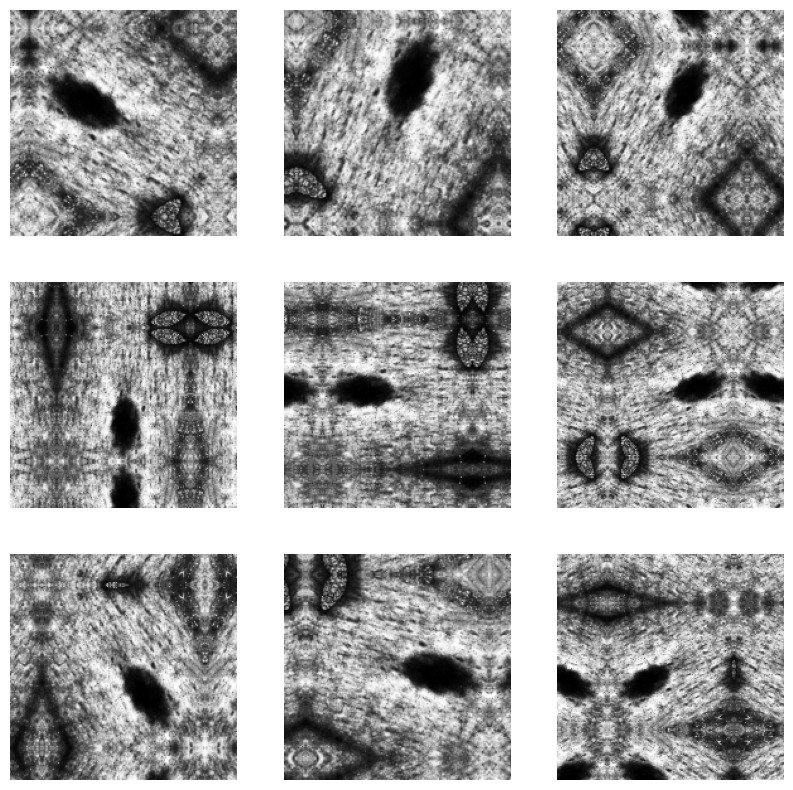

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential()

model.add(layers.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,647,363 (25.36 MB)

 Trainable params: 6,647,363 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = 'adam'
loss_fn = "categorical_crossentropy"
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
epochs = 20
batch_size = 32

history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.6219 - loss: 1.3357 - val_accuracy: 0.7000 - val_loss: 0.8613
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.6778 - loss: 0.8272 - val_accuracy: 0.7275 - val_loss: 0.7479
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.6833 - loss: 0.7682 - val_accuracy: 0.7475 - val_loss: 0.6852
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.7169 - loss: 0.7019 - val_accuracy: 0.7325 - val_loss: 0.6657
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.7290 - loss: 0.6685 - val_accuracy: 0.7550 - val_loss: 0.6480
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.7373 - loss: 0.6420 - val_accuracy: 0.7925 - val_loss: 0.5072
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.7778 - loss: 0.5438 - val_accuracy: 0.8275 - val_loss: 0.4244
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.7982 - loss: 0.4579 - val_accuracy: 0.8625 - v

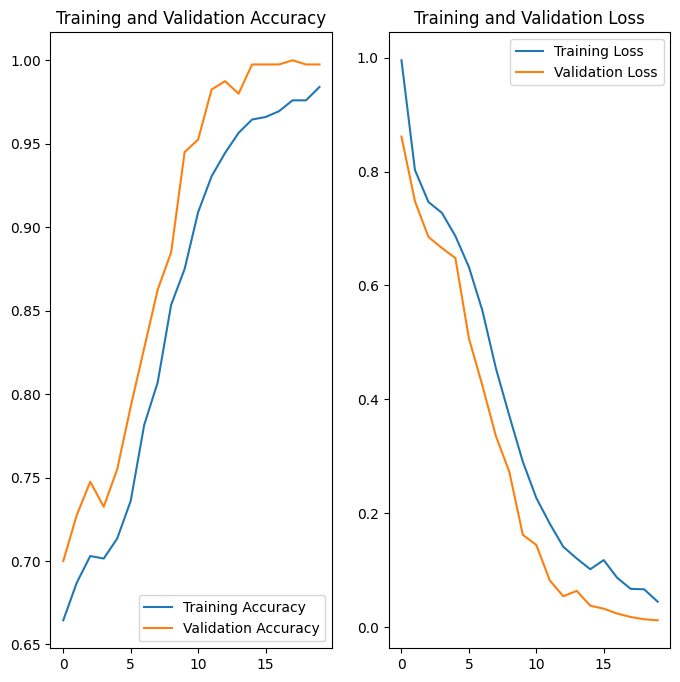

In [ ]:
#Visualize the training results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 569ms/step - accuracy: 0.9994 - loss: 0.0074
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 515ms/step - accuracy: 0.9978 - loss: 0.0106
Accuracy:  0.9994999766349792
Validation Accuracy:  0.9975000023841858
Loss:  0.007020558696240187
Validation Loss 0.012059267610311508


In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

587

In [ ]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/skin cancer/Trainisic20...,seborrheic keratosis
1,/content/drive/MyDrive/skin cancer/Trainisic20...,seborrheic keratosis
2,/content/drive/MyDrive/skin cancer/Trainisic20...,nevus
3,/content/drive/MyDrive/skin cancer/Trainisic20...,nevus
4,/content/drive/MyDrive/skin cancer/Trainisic20...,nevus
...,...,...
582,/content/drive/MyDrive/skin cancer/Trainisic20...,melanoma
583,/content/drive/MyDrive/skin cancer/Trainisic20...,melanoma
584,/content/drive/MyDrive/skin cancer/Trainisic20...,melanoma
585,/content/drive/MyDrive/skin cancer/Trainisic20...,melanoma


In [ ]:
import shutil
import os

augmented_output_path = "/content/drive/MyDrive/skin cancer/Augmented_output"

# Check if the folder exists before deleting
if os.path.exists(augmented_output_path):
    shutil.rmtree(augmented_output_path)  # Delete the folder and all its contents
    print("Augmented_output folder deleted successfully.")
else:
    print("Augmented_output folder does not exist.")

Augmented_output folder deleted successfully.


In [ ]:
import os
import shutil

augmented_output_path = "/content/drive/MyDrive/skin cancer/Augmented_output"

# Create the main output directory if it doesn't exist
if not os.path.exists(augmented_output_path):
    os.makedirs(augmented_output_path)

# List of class names (directories for each class)
class_names = ['melanoma', 'nevus','seborrheic keratosis']

# Source path for the original training images
train_path = "/content/drive/MyDrive/skin cancer/Preprocessed_Train"


for class_name in class_names:
  source_class_path = os.path.join(train_path, class_name)
  destination_class_path = os.path.join(augmented_output_path, class_name)

  # Create a folder for each class within Augmented_output
  if not os.path.exists(destination_class_path):
    os.makedirs(destination_class_path)

  # Copy all image files from each class in the Train folder to the corresponding class folder in Augmented_output
  for filename in os.listdir(source_class_path):
    if filename.endswith(".jpg"):
      source_file_path = os.path.join(source_class_path, filename)
      destination_file_path = os.path.join(destination_class_path, filename)
      shutil.copy2(source_file_path, destination_file_path)

print("Folders for each class created within Augmented_output, and all train images copied to the corresponding class folders.")

Folders for each class created within Augmented_output, and all train images copied to the corresponding class folders.


In [ ]:
!pip install Augmentor

In [ ]:
import Augmentor
import os

# Path to your dataset
path_to_training_dataset = "/content/drive/MyDrive/skin cancer/Preprocessed_Train"
output_path = "/content/drive/MyDrive/skin cancer/Augmented_output"

# List of class names (subdirectories in the training dataset)
class_names = ['melanoma', 'nevus', 'seborrheic keratosis']
# Augmentation threshold (500 images per class)
target_count = 2500

for class_name in class_names:
    class_path = os.path.join(path_to_training_dataset, class_name)
    p = Augmentor.Pipeline(class_path, output_directory=os.path.join(output_path, class_name))

    # Get the current number of images in the class folder
    num_current_images = len(os.listdir(class_path))

    # Calculate how many images need to be augmented to reach 500
    num_samples = max(target_count - num_current_images, 0)

    # Apply augmentations
    if num_samples > 0:
        p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
        # Add other augmentation operations as needed (e.g., zoom, flip, etc.)
        p.sample(num_samples)

    print(f"Augmentation for {class_name} complete.")


Initialised with 374 image(s) found.
Output directory set to /content/drive/MyDrive/skin cancer/Augmented_output/melanoma.

Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7B5B316A9A10>: 100%|██████████| 2126/2126 [00:29<00:00, 72.58 Samples/s]


Augmentation for melanoma complete.
Initialised with 1372 image(s) found.
Output directory set to /content/drive/MyDrive/skin cancer/Augmented_output/nevus.

Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7B5A70180610>: 100%|██████████| 1128/1128 [00:15<00:00, 73.17 Samples/s]


Augmentation for nevus complete.
Initialised with 254 image(s) found.
Output directory set to /content/drive/MyDrive/skin cancer/Augmented_output/seborrheic keratosis.

Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7B5A499CA290>: 100%|██████████| 2246/2246 [00:31<00:00, 71.58 Samples/s]

Augmentation for seborrheic keratosis complete.


In [ ]:
import os

augmented_output_path = "/content/drive/MyDrive/skin cancer/Augmented_output"
class_names = ['melanoma', 'nevus','seborrheic keratosis']

for class_name in class_names:
  class_folder_path = os.path.join(augmented_output_path, class_name)
  num_augmented_images = len(os.listdir(class_folder_path))
  print(f"Class: {class_name}, Number of augmented images: {num_augmented_images}")

Class: melanoma, Number of augmented images: 2500
Class: nevus, Number of augmented images: 2500
Class: seborrheic keratosis, Number of augmented images: 2500


/content/drive/MyDrive/skin cancer/Augmented_output/melanoma/melanoma_original_ISIC_0001102.jpg_f329db2e-5414-492f-a1fc-694f7cb0049d.jpg
/content/drive/MyDrive/skin cancer/Augmented_output/nevus/nevus_original_ISIC_0011115.jpg_74a75474-5632-41f1-adbe-9651d067dc77.jpg
/content/drive/MyDrive/skin cancer/Augmented_output/seborrheic keratosis/seborrheic keratosis_original_ISIC_0012516.jpg_1a27e2b6-b832-4a8f-9f14-f83cf3f07a6f.jpg


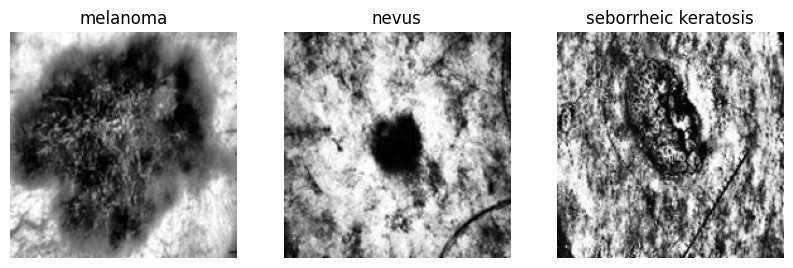

In [ ]:
# Visualizing train data after augmentation
import os
import PIL
import matplotlib.pyplot as plt

# Assuming data_dir_train is the path to your training dataset
data_dir_train = "/content/drive/MyDrive/skin cancer/Augmented_output" # Add the actual path to your training data

class_names = [ 'melanoma', 'nevus', 'seborrheic keratosis']

plt.figure(figsize=(10, 10))
for i in range(3):
    files = os.listdir(os.path.join(data_dir_train,class_names[i]))
    image_path = os.path.join(data_dir_train,class_names[i],files[0])
    print(image_path)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(PIL.Image.open(image_path))
    plt.title(class_names[i])
    plt.axis("off")

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=32,
                                                               image_size=(180,180), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)


Found 7500 files belonging to 3 classes.
Using 6000 files for training.


In [ ]:
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,
                                                            image_size=(180,180), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)


Found 7500 files belonging to 3 classes.
Using 1500 files for validation.


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = Sequential()

model.add(layers.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,647,363 (25.36 MB)

 Trainable params: 6,647,363 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = 'adam'
loss_fn = "categorical_crossentropy"
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,647,363 (25.36 MB)

 Trainable params: 6,647,363 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 30
batch_size = 32

history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 1211s 3s/step - accuracy: 0.4221 - loss: 1.1569 - val_accuracy: 0.5727 - val_loss: 0.8904
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 409s 2s/step - accuracy: 0.6655 - loss: 0.7591 - val_accuracy: 0.7373 - val_loss: 0.6319
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 427s 2s/step - accuracy: 0.7978 - loss: 0.4859 - val_accuracy: 0.8120 - val_loss: 0.4897
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 393s 2s/step - accuracy: 0.8731 - loss: 0.3228 - val_accuracy: 0.8547 - val_loss: 0.3597
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 399s 2s/step - accuracy: 0.9261 - loss: 0.2078 - val_accuracy: 0.8693 - val_loss: 0.3902
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 415s 2s/step - accuracy: 0.9476 - loss: 0.1423 - val_accuracy: 0.9053 - val_loss: 0.3058
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 419s 2s/step - accuracy: 0.9685 - loss: 0.0931 - val_accuracy: 0.9087 - val_loss: 0.3210
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 427s 2s/step - accuracy: 0.9758 - loss: 0.0760 - val_acc

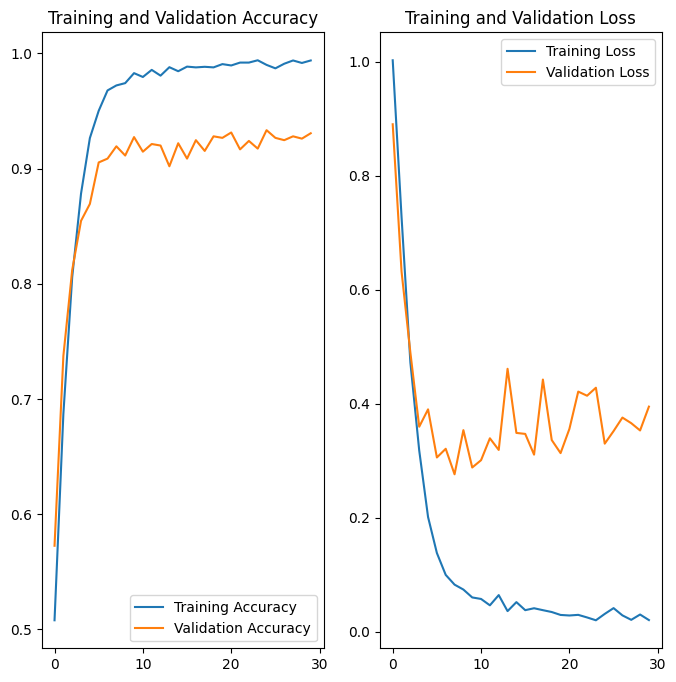

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

188/188 ━━━━━━━━━━━━━━━━━━━━ 108s 572ms/step - accuracy: 1.0000 - loss: 3.6858e-04
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 551ms/step - accuracy: 0.9387 - loss: 0.3482
Accuracy:  1.0
Validation Accuracy:  0.9306666851043701
Loss:  0.00036696382449008524
Validation Loss 0.3949483633041382


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
Actual Class seborrheic keratosis
Predicted Class seborrheic keratosis


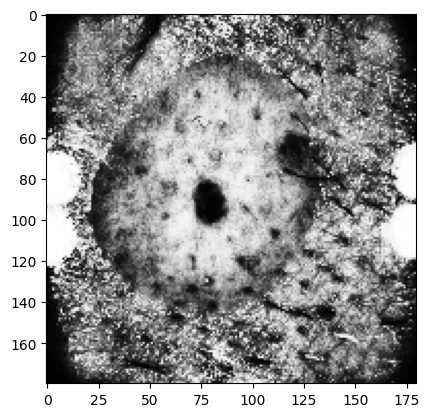

In [ ]:
from glob import glob
from tensorflow.keras.preprocessing.image import load_img
import os # make sure to import the os module
import numpy as np
import matplotlib.pyplot as plt

# Assuming data_dir_test contains the path to your test dataset
data_dir_test = '/content/drive/MyDrive/skin cancer/Preprocessed_Test' # define the variable data_dir_test

Test_image_path = os.path.join(data_dir_test, class_names[2], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[2] +'\n'+ "Predicted Class "+pred_class )